<a href="https://colab.research.google.com/github/Mahmoud-Rady2000/Deep-Learning./blob/main/Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and packages**

In [1]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

**Loading Mnist dataset**

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Splitting the data into train and test and normalize the pixel values to the range [0, 1].**

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Reshaping the data**

In [4]:
# Reshape to (samples, height, width, channels)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
# where  each image is 28x28 pixels with a single channel (grayscale).


In [5]:
input_img = Input(shape=(28, 28, 1))

**Defining define the encoder part of the autoencoder.**

*It consists of several Conv2D layers followed by MaxPooling2D layers.

*The Conv2D layers learn spatial hierarchies of features
in the input images through convolution operations with learnable filters.

*ReLU activation functions are used to introduce non-linearity.

*The MaxPooling2D layers downsample the spatial dimensions of the feature maps,
reducing their size while retaining the most important information.

In [6]:
# Encoder
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)


**Defining the decoder part of the autoencoder aims to reconstruct the original input images**

*from the encoded representations.
*It consists of Conv2D layers followed by UpSampling2D layers.

*Conv2D layers in the decoder learn to reconstruct the spatial structures
 and patterns from the encoded representations.

*UpSampling2D layers upsample the feature maps,
increasing their spatial dimensions to match the original input image size.

In [7]:
# Decoder
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation='relu')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)


**Compiling and fitting the model**








In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 81s 166ms/step - loss: 0.2142 - val_loss: 0.1473
Epoch 2/50
469/469 [==============================] - 64s 137ms/step - loss: 0.1380 - val_loss: 0.1297
Epoch 3/50
469/469 [==============================] - 65s 138ms/step - loss: 0.1266 - val_loss: 0.1226
Epoch 4/50
469/469 [==============================] - 65s 139ms/step - loss: 0.1201 - val_loss: 0.1163
Epoch 5/50
469/469 [==============================] - 66s 141ms/step - loss: 0.1153 - val_loss: 0.1125
Epoch 6/50
469/469 [==============================] - 64s 137ms/step - loss: 0.1119 - val_loss: 0.1096
Epoch 7/50
469/469 [==============================] - 64s 136ms/step - loss: 0.1095 - val_loss: 0.1074
Epoch 8/50
469/469 [==============================] - 64s 136ms/step - loss: 0.1077 - val_loss: 0.1057
Epoch 9/50
469/469 [==============================] - 65s 138ms/step - loss: 0.1063 - val_loss: 0.1046
Epoch 10/50
469/469 [==============================] - 64s 136ms/step - l

**After training, use the trained autoencoder to reconstruct images from the test set.**



In [10]:
decoded_imgs = autoencoder.predict(x_test)


313/313 [==============================] - 5s 15ms/step


**ploting a comparison** of original images and their reconstructed counterparts
to visually assess the performance of the autoencoder.

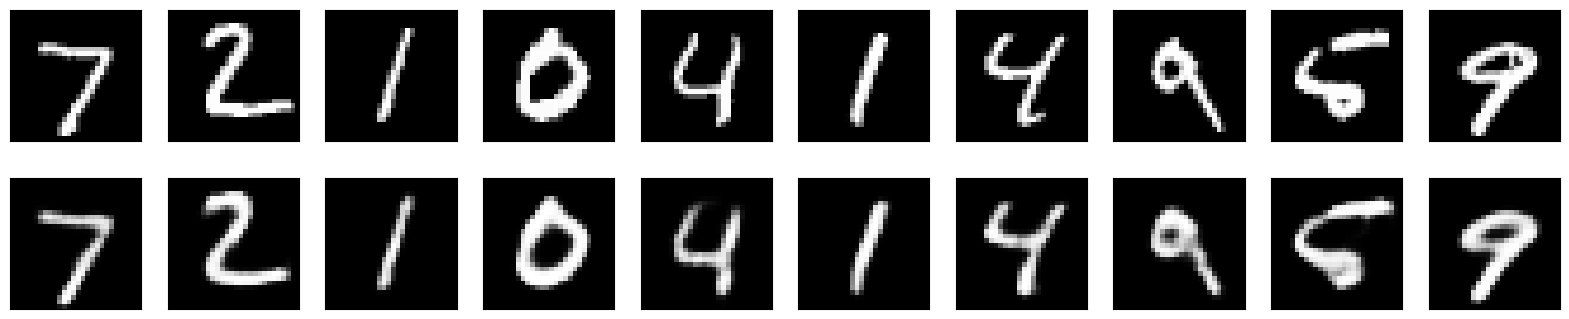

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
